In [0]:
import scipy.io
import numpy as np
import pandas as pd
import torch
import random
from google.colab import files
import dlib
import math

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
files.upload()

Saving 101.jpg to 101.jpg


{'101.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x01\x02\x02\x03\x02\x02\x02\x02\x02\x04\x03\x03\x02\x03\x05\x04\x05\x05\x05\x04\x04\x04\x05\x06\x07\x06\x05\x05\x07\x06\x04\x04\x06\t\x06\x07\x08\x08\x08\x08\x08\x05\x06\t\n\t\x08\n\x07\x08\x08\x08\xff\xdb\x00C\x01\x01\x01\x01\x02\x02\x02\x04\x02\x02\x04\x08\x05\x04\x05\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\x08\xff\xc0\x00\x11\x08\x048\x03*\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x04\x03\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x05\x04\x06\x07\x08\x02\x03\t\n\x01\x00\x0b\xff\xc4\x00P\x10\x00\x02\x01\x02\x04\x04\x04\x03\x05\x07\x03\x03\x03\x01\x00\x13\x01\x02\x03\x04\x11\x00\x05\x12!\x06\x071A\x13"Qa\x08q\x81\x142\x91\xa1\xf0\t\x15#B\xb1\xc1\xd1R\xe1\xf1\x163b\

## -------------------------------------------------------------------------

In [0]:
import zipfile
z = zipfile.ZipFile('data.zip', 'r')
z.extractall()

import zipfile
z = zipfile.ZipFile('test.zip', 'r')
z.extractall()

In [0]:
import os
from PIL import Image
import re

path = 'data/'      

listing = os.listdir(path)   
listing.sort()

years = []
file_name = []

detector = dlib.get_frontal_face_detector()

for file in listing:
  im = Image.open(path + file)
  im = im.resize((128,128))
  
  if np.asarray(im).shape != (128,128,3):
    continue
  else:
    try:
      year = int(re.findall(r'_\d{4}', file)[1][1:]) - int(re.findall(r'_\d{4}', file)[0][1:])
    except Exception:
      continue
    if year < 80 and year >= 0:
      try:
        years.append(int(re.findall(r'_\d{4}', file)[1][1:]) - int(re.findall(r'_\d{4}', file)[0][1:]))
      except Exception:
        continue
      file_name.append(file)
      #im.save('data2/'+file)

In [0]:
test = []

for i in range(2,25):
  img = dlib.load_rgb_image('test/'+str(i)+'.jpg')
  dets = detector(img, 1)
  for k, d in enumerate(dets):
    area = (d.left(), d.top(), d.right(), d.bottom())

  im = Image.open('test/'+str(i)+'.jpg')
  im = im.crop(area)
  im = im.resize((32,32))
  test.append(np.asarray(im))

test = torch.FloatTensor(test)
test /= 255
test = test.permute(0, 3, 1, 2)

In [0]:
X = []

for f in file_name:    
  img = dlib.load_rgb_image(path + f)
  dets = detector(img, 1)
  for k, d in enumerate(dets):
    area = (d.left(),d.top(), d.right(), d.bottom())

  im = Image.open(path + f)
  im = im.crop(area)
  im = im.resize((32,32))
  X.append(np.asarray(im))

In [0]:
y_train = torch.LongTensor(years[:int(len(X)*0.8)])
y_test = torch.LongTensor(years[int(len(X)*0.8):])

X_train = torch.FloatTensor(X[:int(len(X)*0.8)])
X_test = torch.FloatTensor(X[int(len(X)*0.8):])

X_train /= 255.
X_test /= 255.

y_train.shape, X_train.shape

(torch.Size([10070]), torch.Size([10070, 32, 32, 3]))

In [0]:
y_train.unique()

tensor([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
        25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42,
        43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
        61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78,
        79])

tensor(28) tensor(39) tensor(60) tensor(34) tensor(78) tensor(25) tensor(37) tensor(33) tensor(28) tensor(60) 

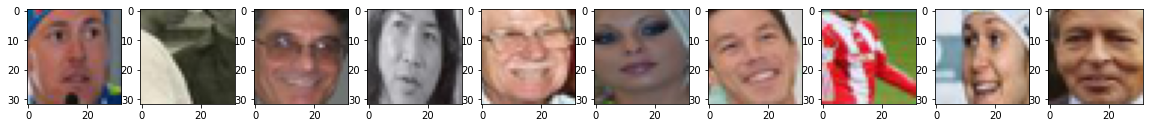

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i])
    print(y_train[i], end=' ')

In [0]:
X_train = X_train.permute(0, 3, 1, 2) #Ставим на 2 место кол-во каналов
X_test = X_test.permute(0, 3, 1, 2)
X_train.shape

torch.Size([10070, 3, 32, 32])

In [0]:
def train(net, X_train, y_train, X_test, y_test):
    device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
    net = net.to(device)
    loss = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.003)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)

    batch_size = 50

    test_accuracy_history = []
    test_loss_history = []

    X_test = X_test.to(device)
    y_test = y_test.to(device)

    for epoch in range(10):
        scheduler.step()
        order = np.random.permutation(len(X_train))

        for start_index in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            net.train()

            batch_indexes = order[start_index:start_index+batch_size]

            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train[batch_indexes].to(device)

            preds = net.forward(X_batch)

            loss_value = loss(preds, y_batch)
            loss_value.backward()

            optimizer.step()

        net.eval()
        test_preds = net.forward(X_test)
        test_loss_history.append(loss(test_preds, y_test).data)#.cpu()

        accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data#.cpu()
        test_accuracy_history.append(accuracy)

        #print(loss(test_preds, y_test).data)
        print(test_preds.argmax(dim=1))
        print(y_test)
        print(abs(test_preds.argmax(dim=1)-y_test).float().mean())
        #pred = net.forward(test.to(device))
        #print(pred.argmax(dim=1)+7)

    return test_accuracy_history, test_loss_history, net

In [0]:
accuracies = {}
losses = {}

!nvidia-smi

from torchvision.models import resnet18, resnet34, resnet50, vgg16
accuracies['resnet18'], losses['resnet18'], OldNet = train(vgg16(pretrained=True), X_train, y_train, X_test, y_test)

Wed Apr 22 14:35:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0    24W /  75W |   7261MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

RuntimeError: ignored

Text(0.5, 1.0, 'Validation Loss')

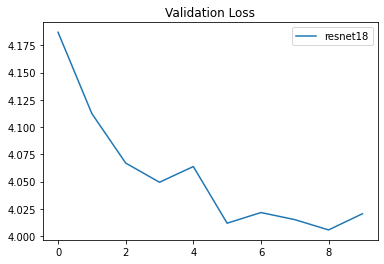

In [0]:
for experiment_id in losses.keys():
    plt.plot(losses[experiment_id], label=experiment_id)
plt.legend()
plt.title('Validation Loss')

In [0]:
files.upload()

Saving 23.jpg to 23 (1).jpg


{'23.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00`\x00`\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc0\x00\x11\x08\x04I\x03\x0c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1d\x00\x00\x01\x05\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x02\x03\x05\x06\x01\x07\x08\t\xff\xc4\x00a\x10\x00\x02\x01\x02\x04\x02\x05\x06\t\x07\x08\x08\x05\x01\x01\x11\x02\x03\x01\x00\x04\x05\x11\x12\x13"#\x06!123ABCRSc\x07\x14Qabrs\x83\xf0q\x81\x82\x93\xa3\xb3\xc3\x15\x91\x92\xa1\xa2\xb2\xd

In [0]:
X = []

file = '0.jpg'

img = dlib.load_rgb_image(file)
dets = detector(img, 1)
for k, d in enumerate(dets):
  area = (d.left(),d.top(), d.right(), d.bottom())

im = Image.open(file)
im = im.crop(area)
im = im.resize((32,32))
X.append(np.asarray(im))

X = torch.FloatTensor(X)
X /= 255.
X = X.permute(0, 3, 1, 2)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
X.shape

torch.Size([1, 3, 32, 32])

In [0]:
pred = OldNet.forward(X.to(device))
print(pred.argmax(dim=1))

tensor([25], device='cuda:0')
